### Importations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

## Inserting the data

In [2]:
X = np.asarray ([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [3.00], [4.75],[1.75], [3.25], [5.00], [2.00], [2.25], [2.50], [2.75], [3.50], [4.00], [4.25],[4.50], [5.50]])

y = np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,0,1,0,1,1,1,1,1,1])

print(X[0].shape)
print(X.T * y)
print(y.shape)

(1,)
[[0.   0.   0.   0.   0.   0.   3.   0.   1.75 0.   5.   0.   2.25 0.
  2.75 3.5  4.   4.25 4.5  5.5 ]]
(20,)


## Graphing the data

C:\Users\sword\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

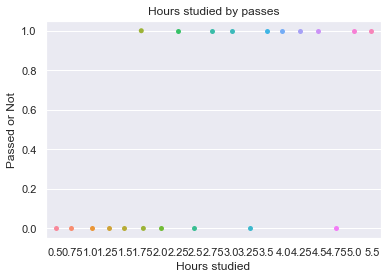

In [3]:
x_axis = 'Hours studied'
y_axis = 'Passed or Not'

graph = sns.stripplot(X[:,0], y)
graph.set(xlabel = x_axis, ylabel = y_axis)

plt.title('Hours studied by passes')

plt.show

## Weights and bias initialisation

In [4]:
def initial_theta_bias(features):
    '''This function creates the inital weights at 1 and the initalial bias at nothing'''
    theta = np.zeros(features.shape[1]) #Creating tuples to store the wieghts and bias
    bias = 0 #Setting bias to zero
    return theta,bias

## Sigmoid Equation

### $\frac{1}{1 + e^{-z}}$

In [5]:
def sigmoid(data):
    '''Calculates the sigmoid of a np array'''
    return 1/(1+np.exp(-data)) # Just return the sigmoid

## Cost Function

In [6]:
def cost_func(hyp,y,num_sample):
    '''This calculates the cost function for logistic regression and nothing else'''
    y_transposed = y.T
    return (-1/num_sample) * (np.sum((y_transposed * np.log(hyp)) + ((1 - y_transposed) * (np.log(1 - hyp)))))

## Updating param

In [7]:
def update(theta,bias,x,y):
    '''This is the update method which is worked out by firstly comming up with the hypothisis for the current model
    then works out the difference and the calculates the derivative of the difference and the bias'''
    num_samples = x.shape[0] #Storing the number of samples
    

    hypothisis = sigmoid(np.dot(theta,x.T) + bias) #Calculating the hypothisis value
    

    cost = cost_func(hypothisis,y,num_samples) #Working out the cost function
    
    
    derivative_theta = (1/num_samples) * (np.dot(x.T, (hypothisis - y.T).T)) #Working out the dervative of theta
    derivative_bias = (1/num_samples) * (np.sum(hypothisis - y.T))           #Working out the dervative of bias           
    
    return cost, derivative_theta, derivative_bias

## Trainer part

In [8]:
def train(theta, bias, x, y , learning_rate, iterations,every):
    '''takes inital weights and bias works out the cost and dervatives then updates the weights and stores the current 
    costs for iteration number of iterations'''
    costs = [] #Storing the costs
    
    for i in range(iterations): #Run iterations number of times
        cost, dw, db = update(theta,bias, x,y)#Calls the update function and gets costs and derivative of weights 
        #bias
        #Update the weights and bias:
        theta = theta - (learning_rate * (dw.T))
        bias = bias - (learning_rate * db.T)
        #Storing the costs:
        if(i % every == 0):
            costs.append(cost)
        
    return theta, bias, costs
        

In [9]:
def predictor(X_pred,weights,bias):
    '''Works out the prediction of the model based on weights and bias'''
    y_prediction = np.zeros((1,X_pred.shape[0])) #Place to store the predictions
    for i in range(X_pred.shape[0]): 
        if(sigmoid(np.dot(weights,X_pred[i].T)+b) > 0.5): #Working out the sigmoid of the solution and checks if 
            #larger than 0.5 and therefore 1 or smaller than 0.5 therefore remains zero
            y_prediction[i] = 1 #Puts the result in the array
            
    return y_prediction

### Explaination

This works by firstly initalising at 0 empty weights and bias which use by using the initial theta bias. Next is the sigmoid which is just a helper function that works out the sigmoid of a number. 

Now the main part starting 

In [23]:
w_init, b_init = initial_theta_bias(X)

### Questions

 ### 1

In [11]:
w_1,b_1,costs_1 = train(w_init,b_init,X,y,0.001,50000,1000)

<AxesSubplot:>

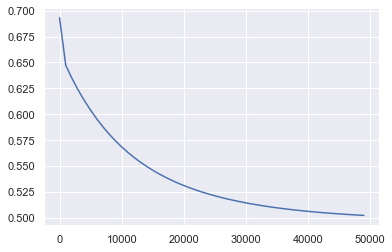

In [12]:
sns.lineplot(x=range(0,50000,1000),y=costs_1)

The cost function began to converge around the 10000 to 30000 mark as the gradient began to decrease dramaticly meaning the model is no longer learning from the data. 

### 2

In [21]:
w_2,b_2,costs_2 = train(w_init,b_init,X,y,10,50000,1000)

C:\Users\sword\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\sword\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


<AxesSubplot:>

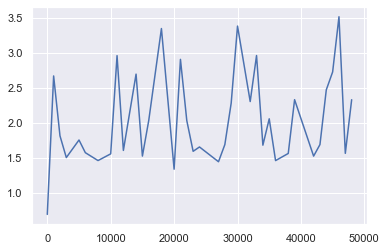

In [22]:
sns.lineplot(x=range(0,50000,1000),y=costs_2)

The the graph is occelating between both sides of the parabola for the loss thats why its not a smooth curve. This is causing the cost to not converge at the minima of the parobola.

### 3(A)

I would use have three different hypothisis functions and paramaters to work out which class is most likely to belong in. This will be done using three different sets of bias and weights and which ever is the highest sigmoid return would be the most likely class. 

### 3(B)

To do a multclass regression you will basically have three logistic regression functions which serve each class which goes as follows (Setosa vs non-Setosa, Versicolour vs non-Versicolour, Virginica vs non-Virginica). Therefore I would first have three sets of labels like so:
y_setosa
y_Versicolour
y_Virginica

And each label will be edited to keep the respective class and turn every other class to 0 this would make each one a binary between class and not in class. Then you will perform the whole task again three time but the main thing that will change is the predictor:




